In [7]:
import pandas as pd
import numpy as np
data = pd.read_csv("heart.csv")

print head

In [5]:
data.head()

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,1,56,Female,Other,9.6,8.3,175,6,No,No,4,145,33,3,No,No,4,Yes,9,10
1,2,46,Male,Teacher,6.4,7.3,97,6,No,No,3,143,18,5,Yes,No,0,No,9,8
2,3,32,Female,Doctor,6.9,1.0,467,14,No,No,2,60,34,1,No,No,7,Yes,10,5
3,4,60,Male,Doctor,9.2,3.7,471,16,No,Yes,6,94,19,1,No,Yes,4,Yes,5,8
4,5,25,Male,Student,9.2,2.5,364,2,No,Yes,7,152,15,4,No,Yes,0,No,1,1


check the number of null values

In [6]:
data.isnull().sum()

,0
ID,0
Age,0
Gender,0
Occupation,0
Sleep Hours,0
Physical Activity (hrs/week),0
Caffeine Intake (mg/day),0
Alcohol Consumption (drinks/week),0
Smoking,0
Family History of Anxiety,0


In [10]:
data.loc[1,"Age"] = np.nan
data.loc[4,"ID"] = np.nan
data.loc[5,"Age"] = np.nan
data.loc[6,"Age"] = np.nan
data.loc[5,"Gender"] = np.nan

adding an outlier

In [32]:
data.loc[7,"Age"] = 800

In [27]:
data.isnull().sum()

,0
ID,1
Age,4
Gender,1
Occupation,0
Sleep Hours,0
Physical Activity (hrs/week),0
Caffeine Intake (mg/day),0
Alcohol Consumption (drinks/week),0
Smoking,0
Family History of Anxiety,0


# M1 : IQR

In [31]:
Q1 = data["Age"].quantile(0.25)
Q3 = data["Age"].quantile(0.75)
IQR = Q3 -Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [33]:
outliers = data[(data["Age"] < lower_bound) | (data["Age"] > upper_bound)]
print("Detected Outliers:", outliers)

Detected Outliers:     ID    Age Gender Occupation  Sleep Hours  Physical Activity (hrs/week)  \
7  8.0  800.0   Male    Teacher          4.9                           0.5   

   Caffeine Intake (mg/day)  Alcohol Consumption (drinks/week) Smoking  \
7                       413                                  4      No   

  Family History of Anxiety  Stress Level (1-10)  \
7                        No                    3   

   Heart Rate (bpm during attack)  Breathing Rate (breaths/min)  \
7                              88                            36   

   Sweating Level (1-5) Dizziness Medication  Therapy Sessions (per month)  \
7                     5        No        Yes                             6   

  Recent Major Life Event  Diet Quality (1-10)  \
7                      No                    4   

   Severity of Anxiety Attack (1-10)  
7                                  2  


# M2 : Z Score

as the 7th is the outlier print the 7th row and as the value is 50 i.e. greater that +-3 it is the outlier

In [35]:
z_score =( data["Age"] - data["Age"].mean()) / data["Age"].std()
print(z_score.head(8))

0     0.987990
1          NaN
2    -0.595998
3     1.251988
4          NaN
5          NaN
6          NaN
7    50.091635
Name: Age, dtype: float64


# M3 : Binning


## width (based on range of each bin)


In [39]:
age_min = min(data["Age"])
age_max = max(data["Age"])
age_width = age_max - age_min
print("min age" , age_min ,"max age" , age_max , "width" , age_width)

min age 18.0 max age 800.0 bin width 782.0


In [40]:
bins = 3
bin_width = (age_width/bins)
print("bin width is " , bin_width)

bin width is  260.6666666666667


In [46]:
bin_label = ("l1" , "l2" , "l3")
equal_bin_width = pd.cut(data["Age"] , bins , labels = bin_label)
print(equal_bin_width.value_counts())

Age
l1    11995
l3        1
l2        0
Name: count, dtype: int64


## Frequency (based on the no.of each bin element)


In [56]:
frequency = 3
equal_bin_frequency = pd.qcut(data["Age"] , frequency , duplicates = "drop")
print(equal_bin_frequency.value_counts())

Age
(33.0, 49.0]      4171
(17.999, 33.0]    4042
(49.0, 800.0]     3783
Name: count, dtype: int64


# M4 : visualization

<Axes: ylabel='Age'>

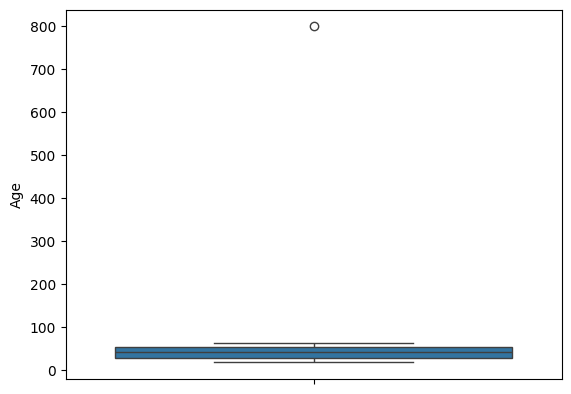

In [47]:
import seaborn as sns
sns.boxplot(data["Age"])

<Axes: xlabel='Age', ylabel='Count'>

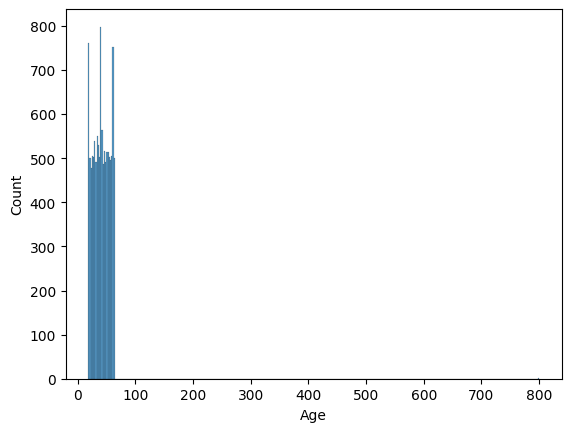

In [48]:
sns.histplot(data["Age"])

<Axes: xlabel='ID', ylabel='Age'>

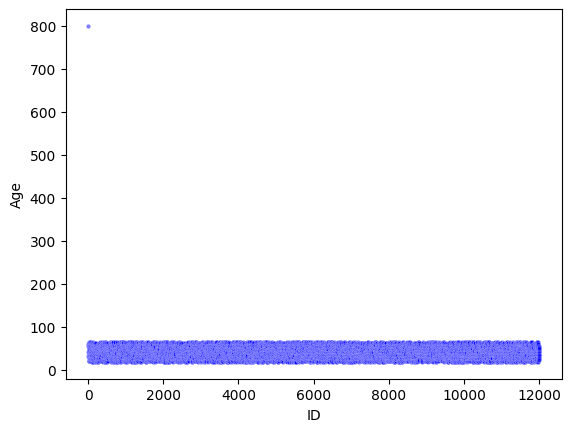

In [55]:
sns.scatterplot(x=data["ID"], y= data["Age"],alpha=0.5, s=10, color='blue')

adding duplicate

In [21]:
data.loc[len(data)] = data.loc[0]
data

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,1.0,56.0,Female,Other,9.6,8.3,175,6,No,No,4,145,33,3,No,No,4,Yes,9,10
1,2.0,NaN,Male,Teacher,6.4,7.3,97,6,No,No,3,143,18,5,Yes,No,0,No,9,8
2,3.0,32.0,Female,Doctor,6.9,1.0,467,14,No,No,2,60,34,1,No,No,7,Yes,10,5
3,4.0,60.0,Male,Doctor,9.2,3.7,471,16,No,Yes,6,94,19,1,No,Yes,4,Yes,5,8
4,NaN,NaN,Male,Student,9.2,2.5,364,2,No,Yes,7,152,15,4,No,Yes,0,No,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11997,11998.0,23.0,Female,Student,9.8,8.1,140,19,Yes,No,2,81,33,2,No,No,8,No,1,10
11998,11999.0,52.0,Male,Teacher,5.9,6.6,114,12,No,No,9,90,14,5,No,No,3,No,9,5
11999,12000.0,50.0,Male,Teacher,6.6,7.8,114,0,No,No,7,107,19,2,No,Yes,3,No,8,2
12000,1.0,56.0,Female,Other,9.6,8.3,175,6,No,No,4,145,33,3,No,No,4,Yes,9,10


checking the duplicate row

In [22]:
print("Duplicate Rows:", data.duplicated())

Duplicate Rows: 0        False
1        False
2        False
3        False
4        False
         ...  
11997    False
11998    False
11999    False
12000     True
12001     True
Length: 12002, dtype: bool


droping the duplicate row

In [23]:
data = data.drop_duplicates()

now the cleaned dataset

In [24]:
print("Duplicate Rows:", data.duplicated())

Duplicate Rows: 0        False
1        False
2        False
3        False
4        False
         ...  
11995    False
11996    False
11997    False
11998    False
11999    False
Length: 12000, dtype: bool
